In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import PIL
from google.colab.patches import cv2_imshow
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/data/yolos/weights/best.pt')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2021-11-21 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients
Adding AutoShape... 


In [25]:
import collections
import numpy as np

In [100]:
img00 = cv2.imread('/content/drive/MyDrive/data/yolos/1.png')

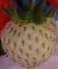

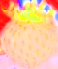

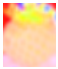

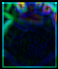

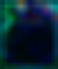

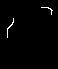

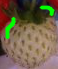

In [119]:
img00 = cv2.imread('/content/drive/MyDrive/data/yolos/22.png')
cv2_imshow(img00)

hsv = cv2.cvtColor(img00, cv2.COLOR_BGR2HSV)
# hsv = hsv[:]
for i in range(hsv.shape[0]):
    for j in range(hsv.shape[1]):
        hsv[i][j][2] = 255
img1 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(img1)

# img = cv2.blur(img1,(8,8))
# cv2_imshow(img)
# img = cv2.bilateralFilter(img, 11, 17, 17)
img = cv2.GaussianBlur(img1, (5,5), cv2.BORDER_DEFAULT)
cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (255, 255, 255), 3)

cv2_imshow(img)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.pyrMeanShiftFiltering(img, 21, 51)
# cv2_imshow(img)
x = cv2.Sobel(img, 5, 1,0, ksize=3, scale=1)
y = cv2.Sobel(img, 5, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
img = cv2.addWeighted(absx, 0.5, absy, 0.5,0)
cv2_imshow(img)

img = cv2.GaussianBlur(img, (9,9), cv2.BORDER_DEFAULT)
cv2_imshow(img)

# can = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
can = cv2.Canny(np.uint8(img), 100,200)
cv2_imshow(can)
# a = cv2.blur(can,(8,8)) - can * 0.5

# cv2_imshow(can)

# cv2.rectangle(img, (cors[0], cors[1]), (cors[2], cors[3]), (0, 165, 255), 1)

contours2, hierarchy2 = cv2.findContours(can, cv2.RETR_CCOMP ,
                                               cv2.CHAIN_APPROX_TC89_L1 )
cv2.drawContours(img00, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(img00)

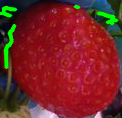

In [104]:
cv2.drawContours(img00, contours2, 8, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(img00)

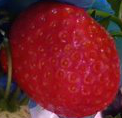

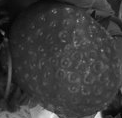

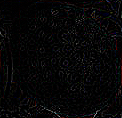

error: ignored

In [119]:
# to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image
image1 = cv2.imread('/content/drive/MyDrive/data/yolos/1.png')
cv2_imshow(image1)
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray1)
image1 = cv2.Laplacian(image1,cv2.CV_64F)
# ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(image1)
img = cv2.Canny(image1.copy(),100,200)
cv2_imshow(img)
contours2, hierarchy2 = cv2.findContours(img, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_TC89_L1)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image_copy2)
image_copy3 = image1.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2_imshow(image_copy3)

In [116]:
from PIL import Image
import numpy as np

In [111]:
def c(img1):
    # отображаем контуры поверх изображения
    cv2_imshow(img1)
    
    img = np.zeros(img1.shape, img1.dtype)
    alpha = 1.0 # Simple contrast control
    beta = 0    # Simple brightness control
    alpha = 1.3
    beta = 40
    for y in range(img1.shape[0]):
        for x in range(img1.shape[1]):
            for c in range(img1.shape[2]):
                img[y,x,c] = np.clip(alpha*img1[y,x,c] + beta, 0, 255)

    cv2_imshow(img)
    cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

    contours, hierarchy = cv2.findContours(image=img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)   
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    # cv2_imshow(contours)
    cv2_imshow(img) # выводим итоговое изображение в окно

In [113]:
def get_strawberries_maturity(img, preds):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for pred in preds:
        cropped_strawberry = img[pred['ymin']:pred['ymax'], pred['xmin']:pred['xmax']]

        hsv_strawberry = cv2.cvtColor(cropped_strawberry, cv2.COLOR_BGR2HSV)
        red1 = cv2.inRange(hsv_strawberry[:, :, 0], 170, 180)
        red2 = cv2.inRange(hsv_strawberry[:, :, 0], 0, 10)
        green = cv2.inRange(hsv_strawberry[:, :, 0], 28, 80)
        red = cv2.bitwise_or(red1, red2)
        cv2_imshow(cropped_strawberry)
        # c(cropped_strawberry)



        stat = sum(collections.Counter(x)[255] for x in red)
        total = red.shape[0] * red.shape[1] - sum(collections.Counter(x)[255] for x in green)
        if total == 0:
            percentage = 0.0
        else:
            percentage = round(stat / total / 0.8, 3)
        if percentage > 1:
            percentage = 1.0
        # font = cv2.FONT_HERSHEY_SIMPLEX
        # cv2.rectangle(img, (pred['xmin'], pred['ymin']), (pred['xmax'], pred['ymax']), (0, 165, 255), 1)
        # cv2.putText(img, f'Maturity {percentage}', (pred['xmin'], pred['ymin']), font, 0.6, (0, 165, 255), 0)
        # pred['maturity'] = percentage
    return img

def get_strawberries_bboxes(path):
    pil_image = Image.open(path)
    res = model(pil_image)
    # res.render()
    processed_preds = []
    for cors in res.xyxy[0]:
        print(cors.data)
        print(cors.data[4].item())
        processed_preds.append({
            'xmin': int(cors.data[0]),
            'ymin': int(cors.data[1]),
            'xmax': int(cors.data[2]),
            'ymax': int(cors.data[3]),
            'confidence': cors.data[4].item(),
        })
    img = get_strawberries_maturity(res.imgs[0], processed_preds)
    cv2_imshow(img)
    print(processed_preds)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


tensor([188.49460, 238.35300, 310.14728, 356.32861,   0.85777,   0.00000])
0.8577658534049988
tensor([257.87698, 357.33585, 333.33026, 425.87616,   0.77967,   0.00000])
0.779668927192688
tensor([ 96.62893, 288.09134, 179.93082, 365.37347,   0.72627,   0.00000])
0.726265013217926
tensor([162.42763, 326.86621, 220.65456, 395.68365,   0.63772,   0.00000])
0.6377217769622803
tensor([1.36752e+01, 3.17009e+02, 7.37555e+01, 3.76724e+02, 3.49544e-01, 0.00000e+00])
0.3495442867279053


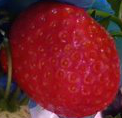

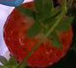

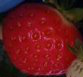

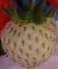

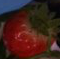

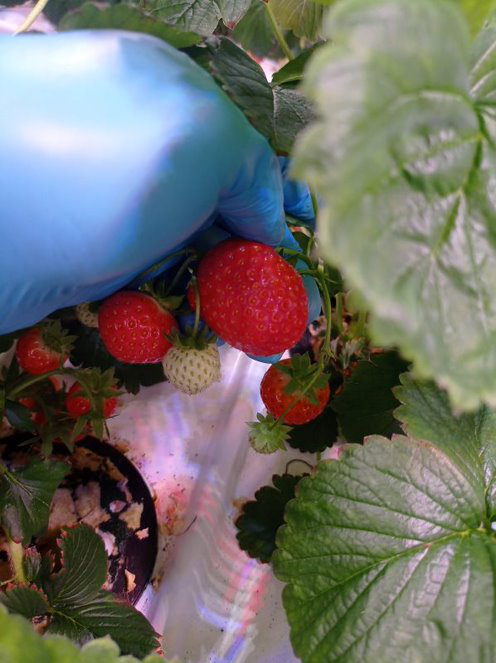

[{'xmin': 188, 'ymin': 238, 'xmax': 310, 'ymax': 356, 'confidence': 0.8577658534049988}, {'xmin': 257, 'ymin': 357, 'xmax': 333, 'ymax': 425, 'confidence': 0.779668927192688}, {'xmin': 96, 'ymin': 288, 'xmax': 179, 'ymax': 365, 'confidence': 0.726265013217926}, {'xmin': 162, 'ymin': 326, 'xmax': 220, 'ymax': 395, 'confidence': 0.6377217769622803}, {'xmin': 13, 'ymin': 317, 'xmax': 73, 'ymax': 376, 'confidence': 0.3495442867279053}]


In [114]:
get_strawberries_bboxes('/content/drive/MyDrive/data/yolos/2.jpg')

In [108]:
from PIL import Image

In [120]:
def f(path='/content/drive/MyDrive/data/yolos/2.jpg'):
    res = model(path)
    img = cv2.imread(path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for cors in res.xyxy[0]:
        cors = list(map(int, cors.data))
        cut = img[cors[1]:cors[3], cors[0]:cors[2]]


        hsv = cv2.cvtColor(cut, cv2.COLOR_BGR2HSV)
        red1 = cv2.inRange(hsv[:, :,  0], 170, 180)
        red2 = cv2.inRange(hsv[:, :,  0], 0, 10)
        green = cv2.inRange(hsv[:, :,  0], 28, 80)
        red = cv2.bitwise_or(red1, red2)
        # cv2_imshow(green)
        # cv2_imshow(cut)
        stat = sum(collections.Counter(x)[255] for x in red)
        total = red.shape[0] * red.shape[1] - sum(collections.Counter(x)[255] for x in green)
        if not total:
            continue
        percentage = round(stat / total / 0.8, 3)
        if percentage > 1: percentage = 1
        percentage = 'Maturity ' + str(percentage)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.rectangle(img, (cors[0], cors[1]), (cors[2], cors[3]), (0, 165, 255), 1)
        cv2.putText(img, percentage, (cors[0],cors[1]), font, 0.6, (0, 165, 255), 0)
    cv2_imshow(img)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


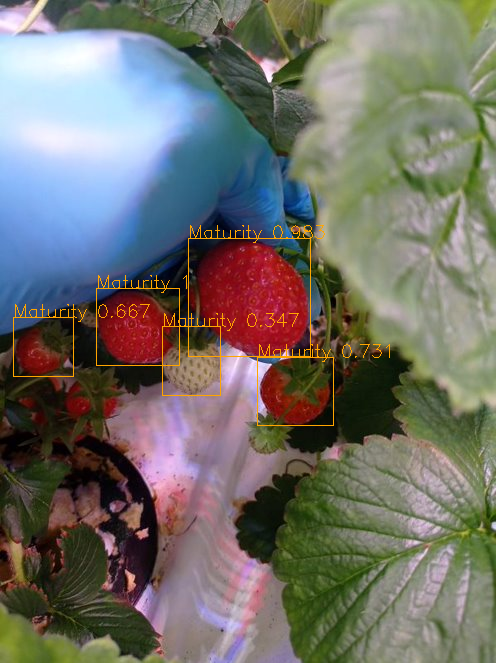

In [121]:
f()

In [27]:
cv2.imread('/content/drive/MyDrive/data/yolos/2.jpg').shape

(663, 496, 3)

In [28]:
import numpy as np

In [29]:
import torchvision.transforms.functional as F

def scale(img, new_h):
    w, h = img.size
    mx = max(w, h)
    wp = int(mx - w)
    hp = int(mx - h)
    padding = (0, 0, wp, hp)
    img = F.pad(img, padding, 0, 'constant')
    img = F.resize(img, (new_h, new_h))
    return img

In [ ]:
path = '/content/drive/MyDrive/data/yolos/2.jpg'
a = np.asarray(scale(PIL.Image.open(path), 1024))
print(a.shape)
cv2_imshow(a)

In [96]:
import torchvision.transforms.functional as F

def scale(img, new_h):
    w, h = img.size
    mx = max(w, h)
    wp = int(mx - w)
    hp = int(mx - h)
    padding = (0, 0, wp, hp)
    img = F.pad(img, padding, 0, 'constant')
    img = F.resize(img, (new_h, new_h))
    return img

def leaf_squares(path):
    h = 224
    pil_img = PIL.Image.open(path)
    img = scale(pil_img, 1792)
    img = np.asarray(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_orig = img.copy()
    total = h ** 2

    hsv1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    green1 = cv2.inRange(hsv1[:, :], (24, 50, 15), (90, 230, 230))
    for y in range(0, 1792, h):
        for x in range(0, 1792, h):
            cut = img[y:y+h, x:x+h]
            hsv = cv2.cvtColor(cut, cv2.COLOR_BGR2HSV)
            green = cv2.inRange(hsv[:, :], (24, 50, 15), (90, 230, 230))
            stat = sum(collections.Counter(x)[255] for x in green)
            percentage = stat / total
            if percentage > 0.4:
                yield cut

In [ ]:
leaf_squares('/content/drive/MyDrive/data/yolos/3.jpeg')

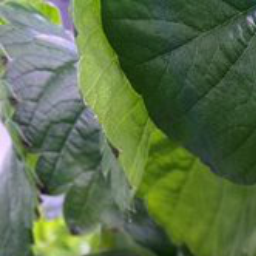

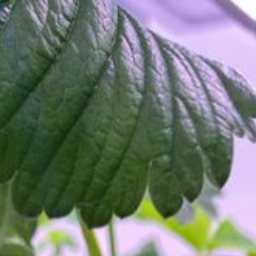

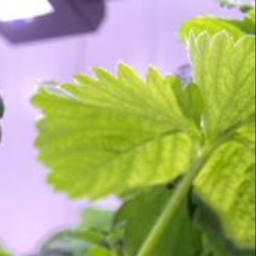

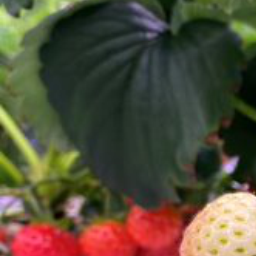

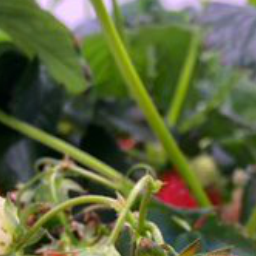

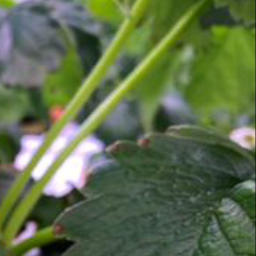

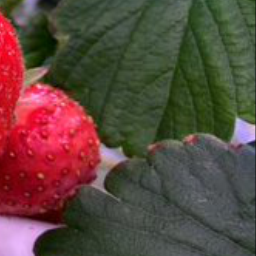

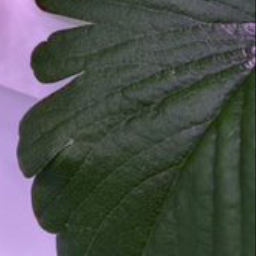

In [97]:
for i in leaf_squares('/content/drive/MyDrive/data/yolos/3.jpeg'):
    cv2_imshow(i)